In [1]:
# **********************************************************************************************************
# Author: Andi Sama 
# Purpose: Demonstrate Quantum Teleportation, from one qubit to another
#   Teleport Quantum Information (state) from qubit 0 to qubit 2 through qubit 1
# Organization: Sinergi Wahana Gemilang
# Creation Date: May 16, 2020
# Changes history:
#   - May 22: finalized, executed both in local Quantum Simulator and IBM Quantum Computing Experience on IBM Cloud
# References:
#   - IBM Think2020 virtual event, May 5-6 2020
#   - IBM Quantum Experience on IBM Cloud
#   - Qiskit.org Youtube Channel
#   - Qiskit.org Textbook
#
# See article in medium.com/@andisama (July 2020)
# **********************************************************************************************************

In [2]:
from qiskit import *
%matplotlib inline

In [3]:
# just do this once - save your token to your computer to use later (IBMQ.load_account()
# get the token from your account in https://quantum-computing.ibm.com/
#  MyAccount -> Qiskit in local environment -> Copy Token
# IBMQ.save_account('your token here....') 

### A. Build The Quantum Circuit

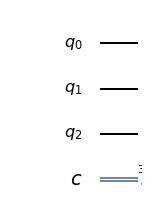

In [4]:
qr = 3 # quantum bit register
cr = 3 # classical bit register
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

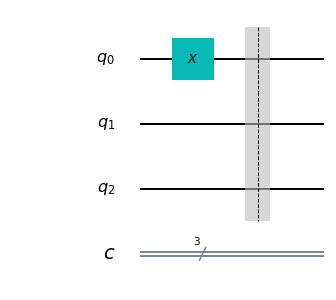

In [5]:
# flip qubit 0 from initial |0> to |1>
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl', scale=1)

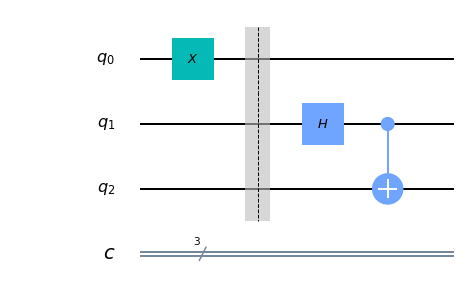

In [6]:
# ready for Quantum Teleporting protocol
# 1st, create entanglement between qubit 1 and 2
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl', scale=1)

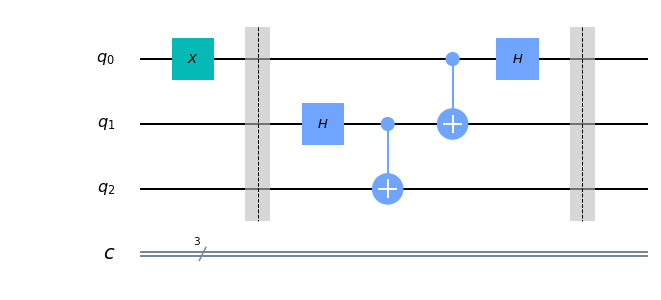

In [7]:
# then
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl', scale=1)

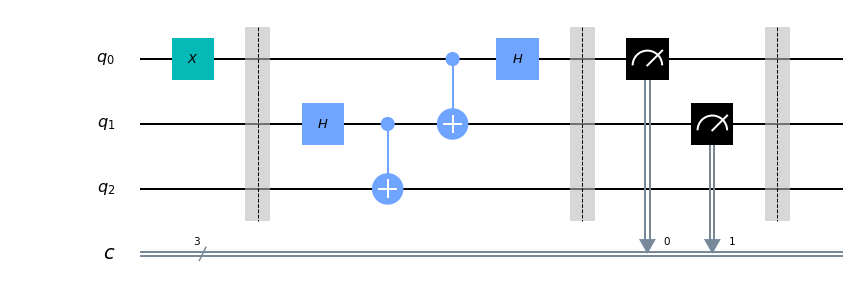

In [8]:
circuit.measure([0,1], [0,1])
circuit.barrier()
circuit.draw(output='mpl', scale=1)

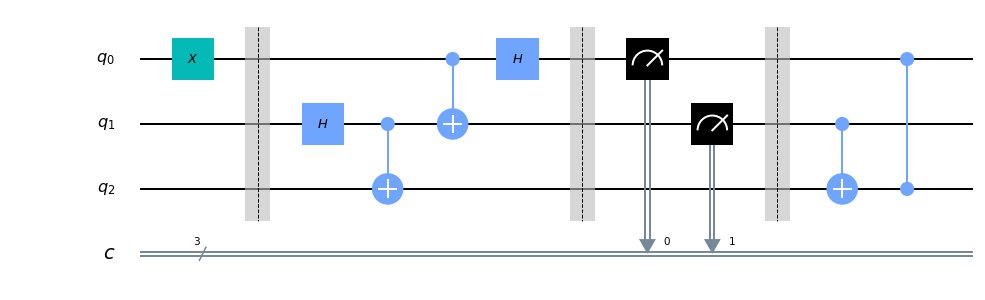

In [9]:
# final one, completing the Quantum Teleportation protocol
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl', scale=1)

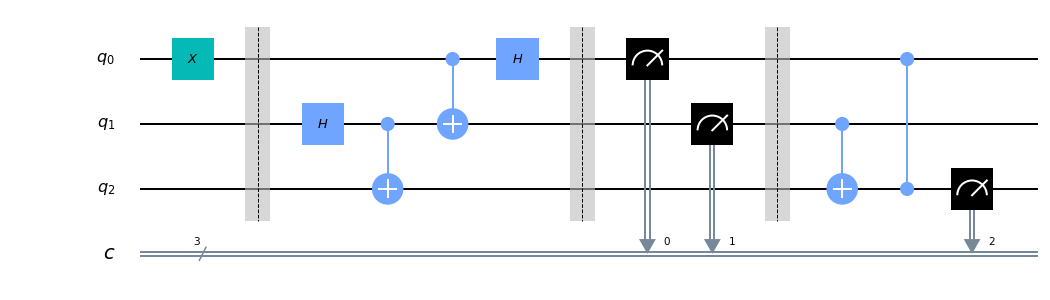

In [10]:
# measure qubit 2. the quantum information should have been teleported from qubit 0 to qubit 2
circuit.measure(2,2)
circuit.draw(output='mpl', scale=1)

### B1. Execute the Quantum Circuit in Quantum Computer Simulator

In [12]:
from qiskit.tools.visualization import plot_histogram

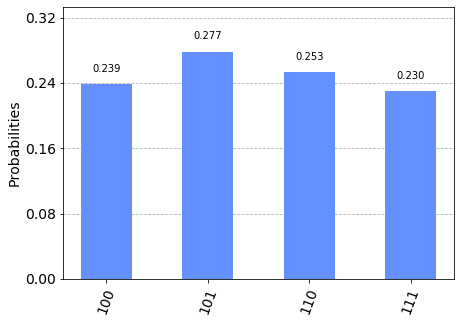

In [13]:
# let's execute our Quantum Circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [14]:
# the counts generate results with all qbit 2 = |1> (qubit sequence: q2 q1 q2), so results on 100, 101, 110 and 111
print(counts)

{'110': 259, '100': 245, '101': 284, '111': 236}


### B2. Execute the Quantum Circuit in Quantum Simulator on IBM Quantum Computing Experience

In [15]:
# Run our quantum circuit on The "Quantum Computer on IBM Cloud" by submitting a job containing our defined quantum circuit
from qiskit.tools.monitor import job_monitor
# load saved credential to access IBM Quantum Computing Experience on IBM Cloud
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# define the backend IBM quantum computer simulator to use
# As we have our qubit measurements in the middle of the Circuit, we will get error message
#   “Qubit measurement not the final instruction.. Error code: 7006” 
#   if we try to run the Circuit in the real Quantum Computer
#     e.g. by settting qcomp = provider.get_backend('ibmq_16_melbourne')
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator')

In [17]:
# submit & monitor our quantum circuit to IBM backend quantum computing experience
job = execute(circuit, backend = qcomp, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


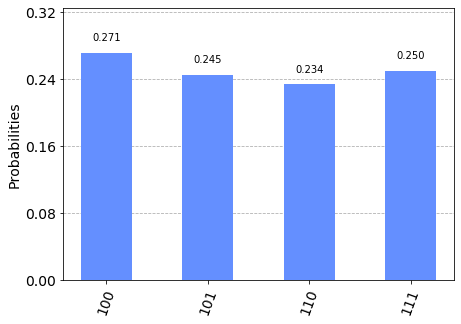

In [18]:
# inspect the result
result = job.result()
plot_histogram(result.get_counts(circuit))

In [19]:
# if error
print(job.error_message())

None


In [20]:
# the counts generate results with all qbit 2 = |1> (qubit sequence: q2 q1 q2), so results on 100, 101, 110 and 111
print(counts)

{'110': 259, '100': 245, '101': 284, '111': 236}
